# _Predicting Flight Delays_

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

### Reading and cleaning data:

In [ ]:
df = pd.read_csv('"C:\Users\97250\Downloads\DataSet.csv"')
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS
0,2022,3,8,18,4,8/18/2022 0:00,DL,DL_CODESHARE,19790,4036,...,118.0,1,780,4,NaN,NaN,NaN,NaN,NaN,0
1,2022,3,8,18,4,8/18/2022 0:00,DL,DL_CODESHARE,19790,4037,...,61.0,1,296,2,NaN,NaN,NaN,NaN,NaN,0
2,2022,3,8,18,4,8/18/2022 0:00,DL,DL_CODESHARE,19790,4038,...,50.0,1,296,2,NaN,NaN,NaN,NaN,NaN,0
3,2022,3,8,18,4,8/18/2022 0:00,DL,DL_CODESHARE,19790,4039,...,50.0,1,296,2,NaN,NaN,NaN,NaN,NaN,0
4,2022,3,8,18,4,8/18/2022 0:00,DL,DL_CODESHARE,19790,4040,...,50.0,1,284,2,29.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613644,2022,3,8,1,1,8/1/2022 0:00,UA,UA_CODESHARE,19977,3404,...,46.0,1,200,1,NaN,NaN,NaN,NaN,NaN,0
613645,2022,3,8,1,1,8/1/2022 0:00,UA,UA_CODESHARE,19977,3403,...,33.0,1,143,1,NaN,NaN,NaN,NaN,NaN,0
613646,2022,3,8,1,1,8/1/2022 0:00,UA,UA_CODESHARE,19977,3402,...,109.0,1,748,3,NaN,NaN,NaN,NaN,NaN,0
613647,2022,3,8,1,1,8/1/2022 0:00,UA,UA_CODESHARE,19977,3401,...,55.0,1,282,2,NaN,NaN,NaN,NaN,NaN,0


Searching for the least amount of unique values in  each column to get rid of them.

In [ ]:
print(df.nunique())

YEAR                         1
QUARTER                      1
MONTH                        1
DAY_OF_MONTH                31
DAY_OF_WEEK                  7
FL_DATE                     31
MKT_UNIQUE_CARRIER          10
BRANDED_CODE_SHARE          14
MKT_CARRIER_AIRLINE_ID      10
MKT_CARRIER_FL_NUM        6278
TAIL_NUM                  5645
OP_CARRIER_FL_NUM         6278
ORIGIN_AIRPORT_ID          368
ORIGIN_AIRPORT_SEQ_ID      368
ORIGIN_CITY_MARKET_ID      344
ORIGIN                     368
ORIGIN_CITY_NAME           362
ORIGIN_STATE_ABR            52
ORIGIN_STATE_NM             52
ORIGIN_WAC                  52
DEST_AIRPORT_ID            368
DEST_AIRPORT_SEQ_ID        368
DEST_CITY_MARKET_ID        344
DEST                       368
DEST_CITY_NAME             362
DEST_STATE_ABR              52
DEST_STATE_NM               52
DEST_WAC                    52
CRS_DEP_TIME              1194
DEP_TIME                  1414
DEP_DELAY                 1130
DEP_DELAY_NEW             1089
DEP_DEL1

In [ ]:
df.drop(['YEAR', 'QUARTER', 'MONTH', 'DUP', 'CANCELLED', 'DEP_DEL15', 'ARR_DEL15', 'FLIGHTS', 'DIV_AIRPORT_LANDINGS'], axis=1, inplace=True)

As we can tell there are a few columns that describe almost the same thing.
We want to drop them as well.

In [ ]:
df.drop(['FL_DATE', 'MKT_UNIQUE_CARRIER', 'BRANDED_CODE_SHARE', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
         'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'ARR_DELAY_GROUP',
         'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_WAC',
         'DEP_DELAY', 'DEP_TIME', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'ARR_DELAY_NEW',
         'DISTANCE_GROUP'], axis=1, inplace=True)
df.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,-4.0,140,141.0,118.0,780,NaN,NaN,NaN,NaN,NaN
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,0.0,78,86.0,61.0,296,NaN,NaN,NaN,NaN,NaN
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,-19.0,84,69.0,50.0,296,NaN,NaN,NaN,NaN,NaN
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,-13.0,89,77.0,50.0,296,NaN,NaN,NaN,NaN,NaN
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,29.0,75,63.0,50.0,284,29.0,0.0,0.0,0.0,0.0


Looking for duplicated rows, to get rid of them.

In [ ]:
df[df.duplicated()]

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


No duplicated rows were found.

Checkin missing values

In [ ]:
df.isnull().sum()

DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
MKT_CARRIER_AIRLINE_ID         0
MKT_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID              0
DEST_AIRPORT_ID                0
CRS_DEP_TIME                   0
DEP_DELAY_NEW              14850
TAXI_OUT                   15432
WHEELS_OFF                 15432
WHEELS_ON                  15616
TAXI_IN                    15616
CRS_ARR_TIME                   0
ARR_TIME                   15616
ARR_DELAY                  17365
CRS_ELAPSED_TIME               0
ACTUAL_ELAPSED_TIME        17365
AIR_TIME                   17365
DISTANCE                       0
CARRIER_DELAY             481108
WEATHER_DELAY             481108
NAS_DELAY                 481108
SECURITY_DELAY            481108
LATE_AIRCRAFT_DELAY       481108
dtype: int64

Filling NaN values with zeros in each of the delay reason columns.

In [ ]:
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

We want to merge 5 columns, giving each reason a number 1-5: <br>
- 'CARRIER_DELAY'
- 'WEATHER_DELAY'
- 'NAS_DELAY'
- 'SECURITY_DELAY'
- 'LATE_AIRCRAFT_DELAY'
<br> into one column __'DELAY_REASON'__. <br>
0 defines the flights that didn't get delayed.

In [ ]:
conditions = [(df['CARRIER_DELAY'] != 0), (df['WEATHER_DELAY'] != 0), (df['NAS_DELAY'] != 0),
              (df['SECURITY_DELAY'] != 0), (df['LATE_AIRCRAFT_DELAY']) != 0]

values = [1, 2, 3, 4, 5]
df['DELAY_REASON'] = np.select(conditions, values)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_REASON
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,140,141.0,118.0,780,0.0,0.0,0.0,0.0,0.0,0
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,78,86.0,61.0,296,0.0,0.0,0.0,0.0,0.0,0
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,84,69.0,50.0,296,0.0,0.0,0.0,0.0,0.0,0
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,89,77.0,50.0,296,0.0,0.0,0.0,0.0,0.0,0
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,75,63.0,50.0,284,29.0,0.0,0.0,0.0,0.0,1


Dropping the columns:
- 'CARRIER_DELAY'
- 'WEATHER_DELAY'
- 'NAS_DELAY'
- 'SECURITY_DELAY'
- 'LATE_AIRCRAFT_DELAY'

In [ ]:
df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)

Prepare the label 'ARR_DELAY' we want to predict.
- Less than 15 minutes: 0
- 15 minutes to 30 minutes: 1
- 30 minutes to 45 minutes: 2
- 45 minutes to 60 minutes: 3
- more than 60 minutes: 4

In [ ]:
delay = []
for flight_del in df['ARR_DELAY']:
    if flight_del > 60:
        delay.append(4)
    elif flight_del > 45:
        delay.append(3)
    elif flight_del > 30:
        delay.append(2)
    elif flight_del > 15:
        delay.append(1)
    else:
        delay.append(0)
df['ARR_DELAY'] = delay
df.rename(columns={'ARR_DELAY': 'DELAY'}, inplace=True)

delay0 = []
delay1 = []
delay2 = []
delay3 = []
delay4 = []
for flight_del in df['DELAY']:
    if flight_del == 4:
        delay4.append(1)
        delay0.append(0)
        delay1.append(0)
        delay2.append(0)
        delay3.append(0)
    if flight_del == 3:
        delay4.append(0)
        delay0.append(0)
        delay1.append(0)
        delay2.append(0)
        delay3.append(1)
    if flight_del == 2:
        delay4.append(0)
        delay0.append(0)
        delay1.append(0)
        delay2.append(1)
        delay3.append(0)
    if flight_del == 1:
        delay4.append(0)
        delay0.append(0)
        delay1.append(1)
        delay2.append(0)
        delay3.append(0)
    if flight_del == 0:
        delay4.append(0)
        delay0.append(1)
        delay1.append(0)
        delay2.append(0)
        delay3.append(0)
df['DELAY_0'] = delay0
df['DELAY_1'] = delay1
df['DELAY_2'] = delay2
df['DELAY_3'] = delay3
df['DELAY_4'] = delay4

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_REASON,DELAY_0,DELAY_1,DELAY_2,DELAY_3,DELAY_4
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,140,141.0,118.0,780,0,1,0,0,0,0
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,78,86.0,61.0,296,0,1,0,0,0,0
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,84,69.0,50.0,296,0,1,0,0,0,0
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,89,77.0,50.0,296,0,1,0,0,0,0
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,75,63.0,50.0,284,1,0,1,0,0,0


In [ ]:
df.drop(['ARR_TIME', 'ACTUAL_ELAPSED_TIME'], axis=1, inplace=True)

In [ ]:
df = df.dropna()
df.isnull().sum()

DAY_OF_MONTH              0
DAY_OF_WEEK               0
MKT_CARRIER_AIRLINE_ID    0
MKT_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID         0
DEST_AIRPORT_ID           0
CRS_DEP_TIME              0
DEP_DELAY_NEW             0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON                 0
TAXI_IN                   0
CRS_ARR_TIME              0
DELAY                     0
CRS_ELAPSED_TIME          0
AIR_TIME                  0
DISTANCE                  0
DELAY_REASON              0
DELAY_0                   0
DELAY_1                   0
DELAY_2                   0
DELAY_3                   0
DELAY_4                   0
dtype: int64

In [ ]:
df.dtypes

DAY_OF_MONTH                int64
DAY_OF_WEEK                 int64
MKT_CARRIER_AIRLINE_ID      int64
MKT_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID           int64
DEST_AIRPORT_ID             int64
CRS_DEP_TIME                int64
DEP_DELAY_NEW             float64
TAXI_OUT                  float64
WHEELS_OFF                float64
WHEELS_ON                 float64
TAXI_IN                   float64
CRS_ARR_TIME                int64
DELAY                       int64
CRS_ELAPSED_TIME            int64
AIR_TIME                  float64
DISTANCE                    int64
DELAY_REASON                int32
DELAY_0                     int64
DELAY_1                     int64
DELAY_2                     int64
DELAY_3                     int64
DELAY_4                     int64
dtype: object

In [ ]:
df = df.sample(n=1000)

In [ ]:
X = df.drop(['DELAY', 'DELAY_0', 'DELAY_1', 'DELAY_2', 'DELAY_3', 'DELAY_4'], axis=1)
Y = df[['DELAY_0', 'DELAY_1', 'DELAY_2', 'DELAY_3', 'DELAY_4']]
print("X shape: ", X.shape, "\nY shape: ", Y.shape)

X shape:  (1000, 17) 
Y shape:  (1000, 5)


In [ ]:
smote = SMOTE()
X_data, Y_data = smote.fit_resample(X.to_numpy(), Y.to_numpy())

In [ ]:
scale = StandardScaler()
X_data = scale.fit_transform(X_data)
X_data

array([[ 1.09930271, -1.04546464,  0.12290052, ..., -1.05469336,
        -1.04088408, -0.41481666],
       [-1.52458816, -0.45201939, -1.3624324 , ...,  0.01079175,
        -0.06108706, -0.41481666],
       [-0.21264272,  1.32831636,  0.12290052, ...,  2.79188847,
         2.87616002, -1.21085198],
       ...,
       [-0.07572768,  0.14142586,  1.62325335, ...,  1.80964887,
         1.26288992,  0.03510215],
       [-1.22627892,  0.89735225,  1.12893618, ..., -0.04058314,
         0.0994909 ,  0.74135622],
       [-1.27713184, -0.06893349,  0.06882286, ..., -0.64139027,
        -0.6837012 , -0.13264493]])

In [ ]:
# Define the number of units in the RNN cell
num_units = 128

# Define the input and output placeholders
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 5])

# Define the RNN cell
rnn_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units)

# Define the RNN model
outputs, states = tf.nn.dynamic_rnn(rnn_cell, x, dtype=tf.float32)

# Define the output layer
W = tf.Variable(tf.zeros([num_units, 5]))
b = tf.Variable(tf.zeros([5]))
pred = tf.nn.softmax(tf.add(tf.matmul(outputs[:, -1], W), b))

# Define the loss function and optimizer
loss = -tf.reduce_mean(y_ * tf.log(pred))
update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Calculate the accuracy
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
Y_train = Y_train.reshape((Y_train.shape[0],5))
Y_val = Y_val.reshape((Y_val.shape[0],5))
Y_test = Y_test.reshape((Y_test.shape[0],5))

In [ ]:
# Train the model
epoches = 300
batch_size = 300
errors = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epoches):
        for start, end in zip(range(0, len(X_train), batch_size),range(batch_size, len(X_train), batch_size)):
            sess.run(update, feed_dict = {x: X_train[start:end],y_: Y_train[start:end]})
        cost = sess.run(tf.nn.l2_loss(pred - Y_val),feed_dict = {x:X_val})
        errors.append(cost)
        if i%100 == 0:
            print("epoch %d, cost = %g" % (i, cost))
    
    # Calculate the accuracy on the test set
    test_accuracy = sess.run(accuracy, feed_dict = {x: X_test, y_: Y_test})
    print("Test accuracy: %g" % test_accuracy)


epoch 0, cost = 306.148
epoch 100, cost = 254.508
epoch 200, cost = 225.481


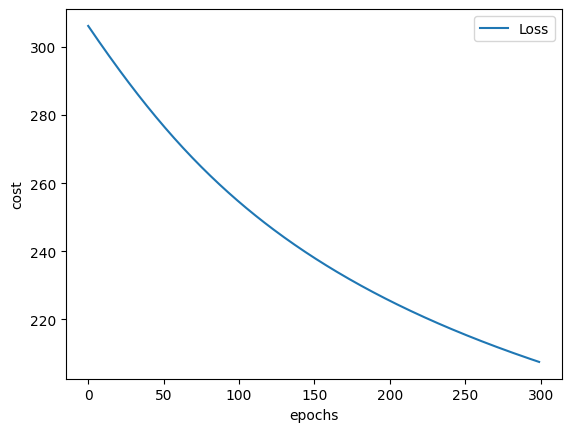

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors,label='Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()

In [ ]:
print("Accuracy: ", round(sess.run(accuracy, feed_dict={x:X_test, y_:Y_test}),2))

Accuracy:  0.66


In [ ]:
print("Accuracy: ", round(sess.run(accuracy, feed_dict={x:X_test, y_:Y_test}),2))

Accuracy:  0.66


#### Let's try optimizing the accuracy:

#### 3 Hidden layers:

In [ ]:
# Placeholder variables for the input features and labels
X = tf.placeholder(tf.float32, shape=[None, 17])
y = tf.placeholder(tf.float32, shape=[None, 5])

# Define the hidden layers
hidden1 = tf.layers.dense(X, 64, activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, 32, activation=tf.nn.relu)
hidden3 = tf.layers.dense(hidden2, 16, activation=tf.nn.relu)

# Define the output layer using the softmax function
logits = tf.layers.dense(hidden3, 5, activation=tf.nn.softmax)

# Define the loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(loss)


C:\Users\malak\AppData\Local\Temp\ipykernel_42792\3876260806.py:6: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.layers.dense(X, 64, activation=tf.nn.relu)
C:\Users\malak\AppData\Local\Temp\ipykernel_42792\3876260806.py:7: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden2 = tf.layers.dense(hidden1, 32, activation=tf.nn.relu)
C:\Users\malak\AppData\Local\Temp\ipykernel_42792\3876260806.py:8: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden3 = tf.layers.dense(hidden2, 16, activation=tf.nn.relu)
C:\Users\malak\AppData\Local\Temp\ipykernel_42792\3876260806.py:11: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.layers.dens

In [ ]:
with tf.Session() as sess:
    # Initialize the variables
    sess.run(tf.global_variables_initializer())

    # Train the model on the training set
    for i in range(300):
        sess.run(optimizer, feed_dict={X: X_train, y: Y_train})

    # Evaluate the model on the test set
    accuracy = sess.run(loss, feed_dict={X: X_test, y: Y_test})
    print("Accuracy: ",round(accuracy, 2))

Accuracy:  0.92


#### 5 hidden layers:

In [ ]:
# Define the number of classes
num_classes = 5

# Define the number of features
num_features = 17

# Define the number of hidden layers
num_hidden_layers = 5

# Define the size of each hidden layer
hidden_layer_size = 32

# Placeholder for the input data
X = tf.placeholder(tf.float32, [None, num_features])

# Placeholder for the true labels
Y_true = tf.placeholder(tf.int32, [None, num_classes])

# Define the weights and biases of each hidden layer
weights = [
    tf.Variable(tf.random_normal([num_features, hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size, hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size, hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size, hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size, num_classes])),
]
biases = [
    tf.Variable(tf.random_normal([hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size])),
    tf.Variable(tf.random_normal([hidden_layer_size])),
    tf.Variable(tf.random_normal([num_classes])),
]

# Define the neural network layers
hidden_layer = tf.add(tf.matmul(X, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)

hidden_layer = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])
hidden_layer = tf.nn.relu(hidden_layer)

hidden_layer = tf.add(tf.matmul(hidden_layer, weights[2]), biases[2])
hidden_layer = tf.nn.relu(hidden_layer)

hidden_layer = tf.add(tf.matmul(hidden_layer, weights[3]), biases[3])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.add(tf.matmul(hidden_layer, weights[4]), biases[4])

# Define the softmax function to generate the final prediction probabilities
predictions = tf.nn.softmax(output_layer)

# Define the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=Y_true))

# Define the optimization method (i.e. gradient descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


In [ ]:
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# Calculate the accuracy on the training set
for i in range(1000):
    sess.run(accuracy, feed_dict={X: X_train, Y_true: Y_train})

In [ ]:
test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y_true: Y_test})
print("Accuracy: ",round(test_accuracy,2))

Accuracy:  0.77
